In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json
!ls /content/drive/MyDrive/ndui

Mounted at /content/drive
drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json
best_model_albuquerque.pth	    ndui_2001_delhi.nc	    ndui_2013_melbourne.nc
best_model_berlin.pth		    ndui_2001_dubai.nc	    ndui_2014_delhi.nc
best_model_cairo.pth		    ndui_2001_hongkong.nc   ndui_2014_dubai.nc
best_model_columbus.pth		    ndui_2001_london.nc     ndui_2014_hongkong.nc
best_model_delhi.pth		    ndui_2001_melbourne.nc  ndui_2014_london.nc
best_model_denver.pth		    ndui_2002_delhi.nc	    ndui_2014_melbourne.nc
best_model_dhaka.pth		    ndui_2002_dubai.nc	    ndui_2015_delhi.nc
best_model_dubai.pth		    ndui_2002_hongkong.nc   ndui_2015_dubai.nc
best_model_hongkong.pth		    ndui_2002_london.nc     ndui_2015_hongkong.nc
best_model_kansas_city.pth	    ndui_2002_melbourne.nc  ndui_2015_london.nc
best_model_la.pth		    ndui_2003_delhi.nc	    ndui_2015_melbourne.nc
best_model_london.pth		    ndui_2003_dubai.nc	    ndui_2016_delhi.nc
best_model_louisville.pth	    ndui_2003_hongko

In [2]:
# INSTALLING REQUIRED LIBRARIES
!pip install -U pyproj -q
!pip install -U utm -q
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.3.3, but you have tornado 6.4.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00


In [3]:
!pip install xarray[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [4]:
# !earthengine authenticate
import ee
import os

import wxee
# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [5]:
generate_built = True

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
ds_delhi = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2022_delhi.nc')
ds_delhi

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB ...

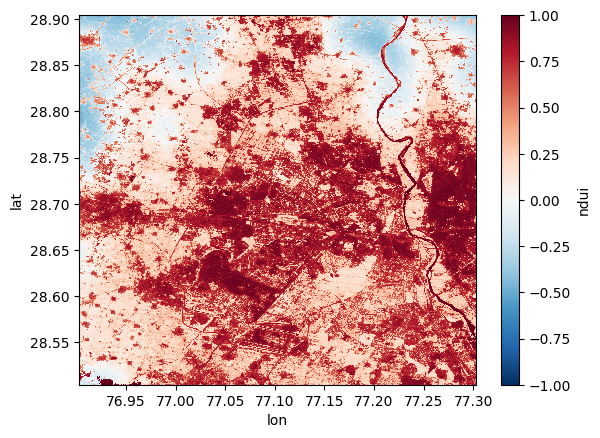

In [ ]:
ds_delhi['ndui'].plot()

In [ ]:
# delhi, dubai, hongkong, london, melbourne

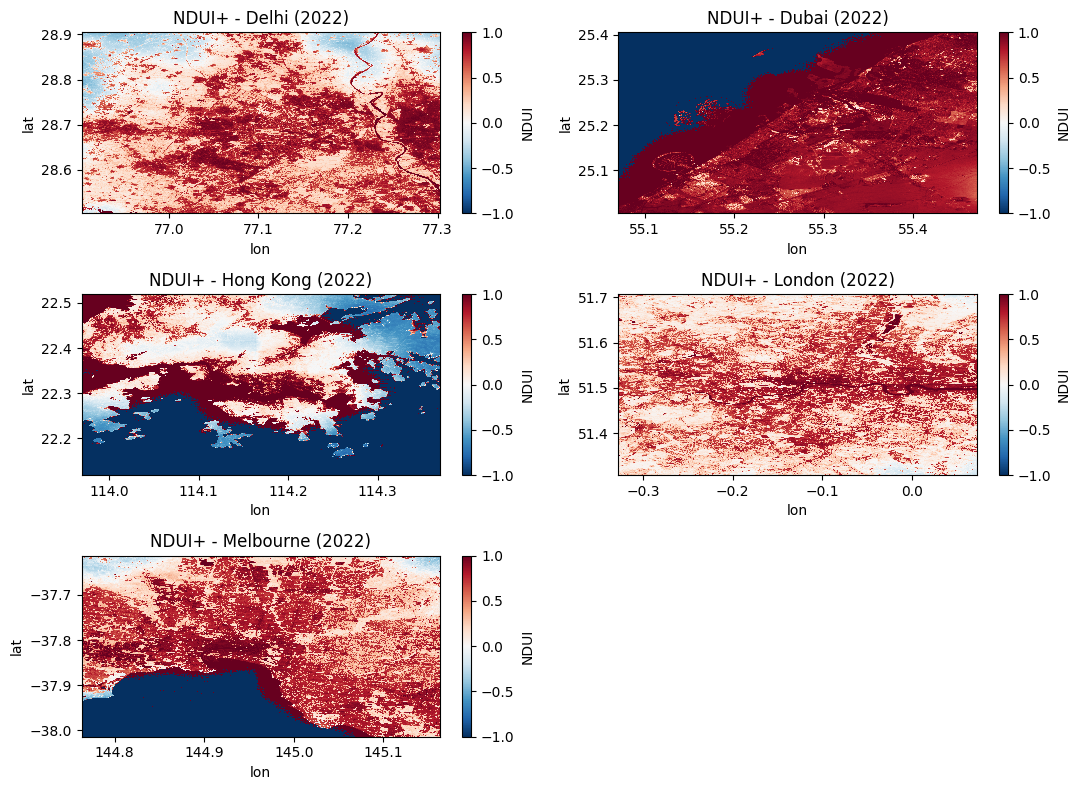

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec

# Load datasets for each city
ds_delhi = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2022_delhi.nc')
ds_dubai = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2022_dubai.nc')
ds_hongkong = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2022_hongkong.nc')
ds_london = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2022_london.nc')
ds_melbourne = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2022_melbourne.nc')

# Create a figure and use GridSpec to organize the layout
fig = plt.figure(figsize=(11, 8))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# Plot the data for each city in its own subplot
ax1 = fig.add_subplot(gs[0, 0])
ds_delhi['ndui'].plot(ax=ax1, cbar_kwargs={'label': 'NDUI'})
ax1.set_title('NDUI+ - Delhi (2022)')

ax2 = fig.add_subplot(gs[0, 1])
ds_dubai['ndui'].plot(ax=ax2, cbar_kwargs={'label': 'NDUI'})
ax2.set_title('NDUI+ - Dubai (2022)')

ax3 = fig.add_subplot(gs[1, 0])
ds_hongkong['ndui'].plot(ax=ax3, cbar_kwargs={'label': 'NDUI'})
ax3.set_title('NDUI+ - Hong Kong (2022)')

ax4 = fig.add_subplot(gs[1, 1])
ds_london['ndui'].plot(ax=ax4, cbar_kwargs={'label': 'NDUI'})
ax4.set_title('NDUI+ - London (2022)')

# Centered subplot on the last row
ax5 = fig.add_subplot(gs[2, 0])
ds_melbourne['ndui'].plot(ax=ax5, cbar_kwargs={'label': 'NDUI'})
ax5.set_title('NDUI+ - Melbourne (2022)')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('ndui_global.png', dpi=300)

In [ ]:
import ee  # Importing Earth Engine
cities = ['Delhi', 'Dubai', 'Hong Kong', 'London', 'Melbourne']

du_ = [ds_delhi, ds_dubai, ds_hongkong, ds_london, ds_melbourne]
# Dictionary to hold each city's AOI
city_aoi = {}
for i in range(len(du_)):
    # Coordinates from du1
    lon_max = du_[i].lon.max().item()
    lon_min = du_[i].lon.min().item()
    lat_max = du_[i].lat.max().item()
    lat_min = du_[i].lat.min().item()

    # Define the AOI using these coordinates
    aoi = ee.Geometry.Polygon([
        [
            [lon_min, lat_min],  # Bottom-left corner
            [lon_max, lat_min],  # Bottom-right corner
            [lon_max, lat_max],  # Top-right corner
            [lon_min, lat_max],  # Top-left corner
        ]
    ])

    city_aoi[cities[i]] = aoi

# Example to print the AOI of a city
for city_name, aoi in city_aoi.items():
    print(f"{city_name} AOI: {aoi.getInfo()}")

Delhi AOI: {'type': 'Polygon', 'coordinates': [[[76.90257060102616, 28.504038038518686], [77.30250056551617, 28.504038038518686], [77.30250056551617, 28.904237497593932], [76.90257060102616, 28.904237497593932], [76.90257060102616, 28.504038038518686]]]}
Dubai AOI: {'type': 'Polygon', 'coordinates': [[[55.07081425106942, 25.004920343816327], [55.470744215559435, 25.004920343816327], [55.470744215559435, 25.404850308306337], [55.07081425106942, 25.404850308306337], [55.07081425106942, 25.004920343816327]]]}
Hong Kong AOI: {'type': 'Polygon', 'coordinates': [[[113.96939484353632, 22.119172325110775], [114.36932480802633, 22.119172325110775], [114.36932480802633, 22.51937178418602], [113.96939484353632, 22.51937178418602], [113.96939484353632, 22.119172325110775]]]}
London AOI: {'type': 'Polygon', 'coordinates': [[[-0.3275706683541835, 51.307322368250674], [0.07235929613582748, 51.307322368250674], [0.07235929613582748, 51.70725233274069], [-0.3275706683541835, 51.70725233274069], [-0.327

In [ ]:
# ds_built_ = []
# start_date = '2023-01-01'
# end_date = '2023-12-31'
# dataset = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1') \
#             .filterDate(start_date, end_date).select('built').mean()
# dataset = dataset.set('system:time_start', 0)
# for city_name, aoi in city_aoi.items():
#     if generate_built:
#         print(f"{city_name} AOI: {aoi.getInfo()}")
#         ds_built = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)
#         ds_built.to_netcdf('/content/drive/MyDrive/earth_engine/dynamic_world_built_'+str(city_name)+'.nc')
#     else:
#         ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_'+str(city_name)+'.nc').load()
#         ds_built = ds_built.rename({"x": "lon", "y": "lat"})
#         ds_built_.append(ds_built)

In [ ]:
import os
import xarray as xr
import ee  # Assuming you've already authenticated and initialized the Earth Engine API

ds_built_ = []
start_date = '2023-01-01'
end_date = '2023-12-31'
dataset = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1') \
            .filterDate(start_date, end_date).select('built').mean()
dataset = dataset.set('system:time_start', 0)

# Dictionary `city_aoi` and variable `generate_built` are assumed to be defined earlier

for city_name, aoi in city_aoi.items():
    file_path = f'/content/drive/MyDrive/earth_engine/dynamic_world_built_{city_name}.nc'

    if generate_built:
        if not os.path.exists(file_path):
            print(f"{city_name} AOI: {aoi.getInfo()}")
            ds_built = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)
            ds_built.to_netcdf(file_path)
        else:
            print(f"File for {city_name} already exists. Loading existing data.")
            ds_built = xr.open_dataset(file_path).load()
            ds_built = ds_built.rename({"x": "lon", "y": "lat"})
            ds_built_.append(ds_built)
    else:
        print(f"Generating new data is disabled. Loading existing data for {city_name}.")
        ds_built = xr.open_dataset(file_path).load()
        ds_built = ds_built.rename({"x": "lon", "y": "lat"})
        ds_built_.append(ds_built)


File for Delhi already exists. Loading existing data.
File for Dubai already exists. Loading existing data.
File for Hong Kong already exists. Loading existing data.
File for London already exists. Loading existing data.
File for Melbourne already exists. Loading existing data.


In [ ]:
ds_built_delhi = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_Delhi.nc')
ds_built_dubai = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_Dubai.nc')
ds_built_hongkong = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_HongKong.nc')
ds_built_london = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_London.nc')
ds_built_melbourne = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_Melbourne.nc')

In [ ]:
ds_built_delhi_mask = ds_built_delhi.built > 0.2
ds_built_delhi_mask

<xarray.DataArray 'built' (time: 1, y: 1487, x: 1485)> Size: 2MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * time         (time) datetime64[ns] 8B 1970-01-01
  * x            (x) float64 12kB 76.9 76.9 76.9 76.9 ... 77.3 77.3 77.3 77.3
  * y            (y) float64 12kB 28.9 28.9 28.9 28.9 ... 28.5 28.5 28.5 28.5
    spatial_ref  int64 8B ...

In [ ]:
ds_built_delhi.interp(y = ds_delhi.lat.values, x = ds_delhi.lon.values, method='nearest')

<xarray.Dataset> Size: 18MB
Dimensions:      (time: 1, y: 1486, x: 1485)
Coordinates:
  * time         (time) datetime64[ns] 8B 1970-01-01
    spatial_ref  int64 8B 0
  * y            (y) float64 12kB 28.9 28.9 28.9 28.9 ... 28.5 28.5 28.5 28.5
  * x            (x) float64 12kB 76.9 76.9 76.9 76.9 ... 77.3 77.3 77.3 77.3
Data variables:
    built        (time, y, x) float64 18MB 0.04555 0.04604 ... 0.5565 0.5426
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
du_ = [ds_delhi, ds_dubai, ds_hongkong, ds_london, ds_melbourne]
ds_built_ = [ds_built_delhi, ds_built_dubai, ds_built_hongkong, ds_built_london, ds_built_melbourne]

In [ ]:
ds_built_[1]

<xarray.Dataset> Size: 18MB
Dimensions:      (time: 1, lon: 1485, lat: 1486)
Coordinates:
  * time         (time) datetime64[ns] 8B 1970-01-01
  * lon          (lon) float64 12kB 55.07 55.07 55.07 ... 55.47 55.47 55.47
  * lat          (lat) float64 12kB 25.41 25.4 25.4 25.4 ... 25.01 25.01 25.0
    spatial_ref  int64 8B 0
Data variables:
    built        (time, lat, lon) float64 18MB 0.02722 0.02729 ... 0.06571
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
from tqdm import tqdm
for i,data in tqdm(enumerate(du_)):
    #print(data)
    ds_built_ndui = ds_built_[i].interp(lat = du_[i].lat.values, lon = du_[i].lon.values, method='nearest')
    du_[i]['built'] = (('lat', 'lon'), ds_built_ndui.built.values[0,:,:])
    du_[i]['built_mask'] = du_[i]['built'] > 0.2
    du_[i] = du_[i].chunk({'lat': 100, 'lon': 100})
    du_[i]['ndui_mask'] = du_[i]['ndui'] * du_[i]['built_mask']
    du_[i] = du_[i].load()

5it [00:03,  1.55it/s]


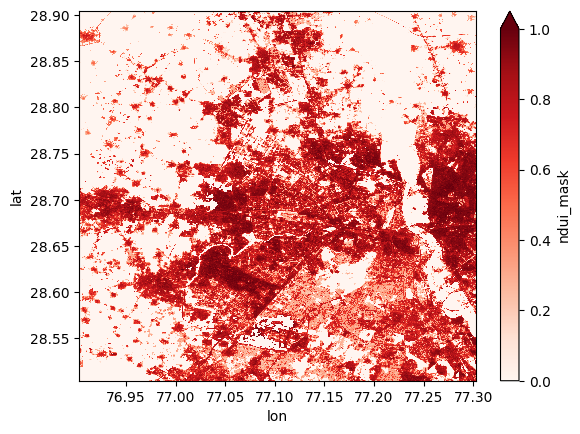

In [ ]:
du_[0].ndui_mask.plot(cmap='Reds', vmin=0.0, extend='max')

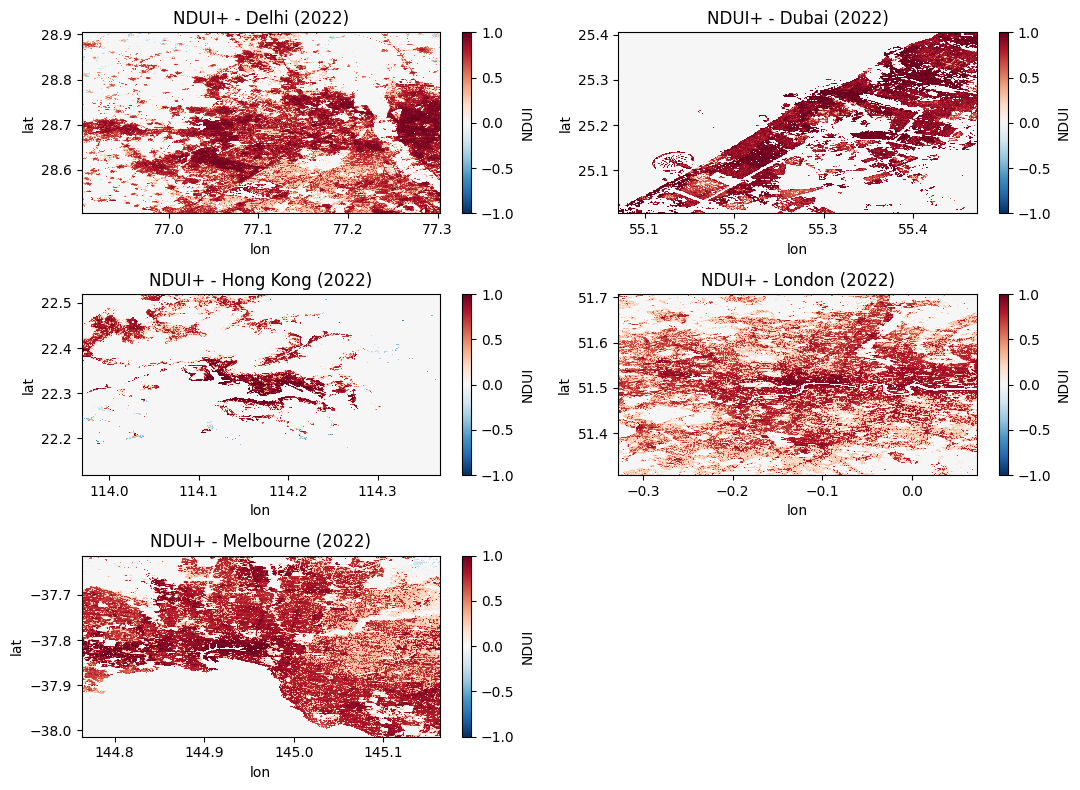

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec

# Create a figure and use GridSpec to organize the layout
fig = plt.figure(figsize=(11, 8))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# Plot the data for each city in its own subplot
ax1 = fig.add_subplot(gs[0, 0])
du_[0].ndui_mask.plot(ax=ax1, cbar_kwargs={'label': 'NDUI'})
ax1.set_title('NDUI+ - Delhi (2022)')

ax2 = fig.add_subplot(gs[0, 1])
du_[1].ndui_mask.plot(ax=ax2, cbar_kwargs={'label': 'NDUI'})
ax2.set_title('NDUI+ - Dubai (2022)')

ax3 = fig.add_subplot(gs[1, 0])
du_[2].ndui_mask.plot(ax=ax3, cbar_kwargs={'label': 'NDUI'})
ax3.set_title('NDUI+ - Hong Kong (2022)')

ax4 = fig.add_subplot(gs[1, 1])
du_[3].ndui_mask.plot(ax=ax4, cbar_kwargs={'label': 'NDUI'})
ax4.set_title('NDUI+ - London (2022)')

# Centered subplot on the last row
ax5 = fig.add_subplot(gs[2, 0])
du_[4].ndui_mask.plot(ax=ax5, cbar_kwargs={'label': 'NDUI'})
ax5.set_title('NDUI+ - Melbourne (2022)')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('ndui_global.png', dpi=300)

# Temporal Maps

In [17]:
ds_delhi_1999 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_1999_delhi.nc')
ds_delhi_2010 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2010_delhi.nc')
ds_delhi_2023 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2023_delhi.nc')
ds_delhi = [ds_delhi_1999, ds_delhi_2010, ds_delhi_2023]

In [18]:
ds_dubai_1999 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_1999_dubai.nc')
ds_dubai_2010 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2010_dubai.nc')
ds_dubai_2023 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2023_dubai.nc')
ds_dubai = [ds_dubai_1999, ds_dubai_2010, ds_dubai_2023]

In [19]:
ds_hongkong_1999 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_1999_hongkong.nc')
ds_hongkong_2010 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2010_hongkong.nc')
ds_hongkong_2023 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2023_hongkong.nc')
ds_hongkong = [ds_hongkong_1999, ds_hongkong_2010, ds_hongkong_2023]

In [20]:
ds_london_1999 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_1999_london.nc')
ds_london_2010 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2010_london.nc')
ds_london_2023 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2023_london.nc')
ds_london = [ds_london_1999, ds_london_2010, ds_london_2023]

In [21]:
ds_melbourne_1999 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_1999_melbourne.nc')
ds_melbourne_2010 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2020_melbourne.nc')
ds_melbourne_2023 = xr.open_dataset('/content/drive/MyDrive/ndui/ndui_2023_melbourne.nc')
ds_melbourne = [ds_melbourne_1999, ds_melbourne_2010, ds_melbourne_2023]

In [22]:
ds_built_delhi = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_Delhi.nc')
ds_built_dubai = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_Dubai.nc')
ds_built_hongkong = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_HongKong.nc')
ds_built_london = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_London.nc')
ds_built_melbourne = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_Melbourne.nc')

In [23]:
# ds_built_delhi_mask = ds_built_delhi.built > 0.2
# ds_built_dubai_mask = ds_built_dubai.built > 0.2
# ds_built_hongkong_mask = ds_built_hongkong.built > 0.2
# ds_built_london_mask = ds_built_london.built > 0.2
# ds_built_melbourne_mask = ds_built_melbourne.built > 0.2

In [24]:
from tqdm import tqdm
for i,data in tqdm(enumerate(ds_delhi)):
    #print(data)
    ds_built_delhi_ndui = ds_built_delhi.interp(y = ds_delhi[i].lat.values, x = ds_delhi[i].lon.values, method='nearest')
    ds_delhi[i]['built'] = (('lat', 'lon'), ds_built_delhi_ndui.built.values[0,:,:])
    ds_delhi[i]['built_mask'] = ds_delhi[i]['built'] > 0.2
    ds_delhi[i] = ds_delhi[i].chunk({'lat': 100, 'lon': 100})
    ds_delhi[i]['ndui_mask'] = ds_delhi[i]['ndui'] * ds_delhi[i]['built_mask']
    ds_delhi[i] = ds_delhi[i].load()

3it [00:04,  1.40s/it]


In [25]:
for i,data in tqdm(enumerate(ds_dubai)):
    #print(data)
    ds_built_dubai_ndui = ds_built_dubai.interp(y = ds_dubai[i].lat.values, x = ds_dubai[i].lon.values, method='nearest')
    ds_dubai[i]['built'] = (('lat', 'lon'), ds_built_dubai_ndui.built.values[0,:,:])
    ds_dubai[i]['built_mask'] = ds_dubai[i]['built'] > 0.2
    ds_dubai[i] = ds_dubai[i].chunk({'lat': 100, 'lon': 100})
    ds_dubai[i]['ndui_mask'] = ds_dubai[i]['ndui'] * ds_dubai[i]['built_mask']
    ds_dubai[i] = ds_dubai[i].load()

3it [00:02,  1.14it/s]


In [26]:
for i,data in tqdm(enumerate(ds_hongkong)):
    #print(data)
    ds_built_hongkong_ndui = ds_built_hongkong.interp(y = ds_hongkong[i].lat.values, x = ds_hongkong[i].lon.values, method='nearest')
    ds_hongkong[i]['built'] = (('lat', 'lon'), ds_built_hongkong_ndui.built.values[0,:,:])
    ds_hongkong[i]['built_mask'] = ds_hongkong[i]['built'] > 0.2
    ds_hongkong[i] = ds_hongkong[i].chunk({'lat': 100, 'lon': 100})
    ds_hongkong[i]['ndui_mask'] = ds_hongkong[i]['ndui'] * ds_hongkong[i]['built_mask']
    ds_hongkong[i] = ds_hongkong[i].load()

3it [00:02,  1.13it/s]


In [27]:
for i,data in tqdm(enumerate(ds_london)):
    #print(data)
    ds_built_london_ndui = ds_built_london.interp(y = ds_london[i].lat.values, x = ds_london[i].lon.values, method='nearest')
    ds_london[i]['built'] = (('lat', 'lon'), ds_built_london_ndui.built.values[0,:,:])
    ds_london[i]['built_mask'] = ds_london[i]['built'] > 0.2
    ds_london[i] = ds_london[i].chunk({'lat': 100, 'lon': 100})
    ds_london[i]['ndui_mask'] = ds_london[i]['ndui'] * ds_london[i]['built_mask']
    ds_london[i] = ds_london[i].load()

3it [00:03,  1.12s/it]


In [28]:
for i,data in tqdm(enumerate(ds_melbourne)):
    #print(data)
    ds_built_melbourne_ndui = ds_built_melbourne.interp(y = ds_melbourne[i].lat.values, x = ds_melbourne[i].lon.values, method='nearest')
    ds_melbourne[i]['built'] = (('lat', 'lon'), ds_built_melbourne_ndui.built.values[0,:,:])
    ds_melbourne[i]['built_mask'] = ds_melbourne[i]['built'] > 0.2
    ds_melbourne[i] = ds_melbourne[i].chunk({'lat': 100, 'lon': 100})
    ds_melbourne[i]['ndui_mask'] = ds_melbourne[i]['ndui'] * ds_melbourne[i]['built_mask']
    ds_melbourne[i] = ds_melbourne[i].load()

3it [00:03,  1.14s/it]


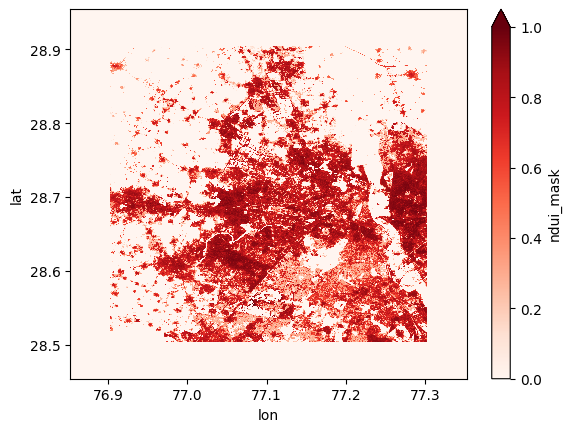

In [14]:
ds_delhi[0].ndui_mask.plot(cmap='Reds', vmin=0.0, extend='max')

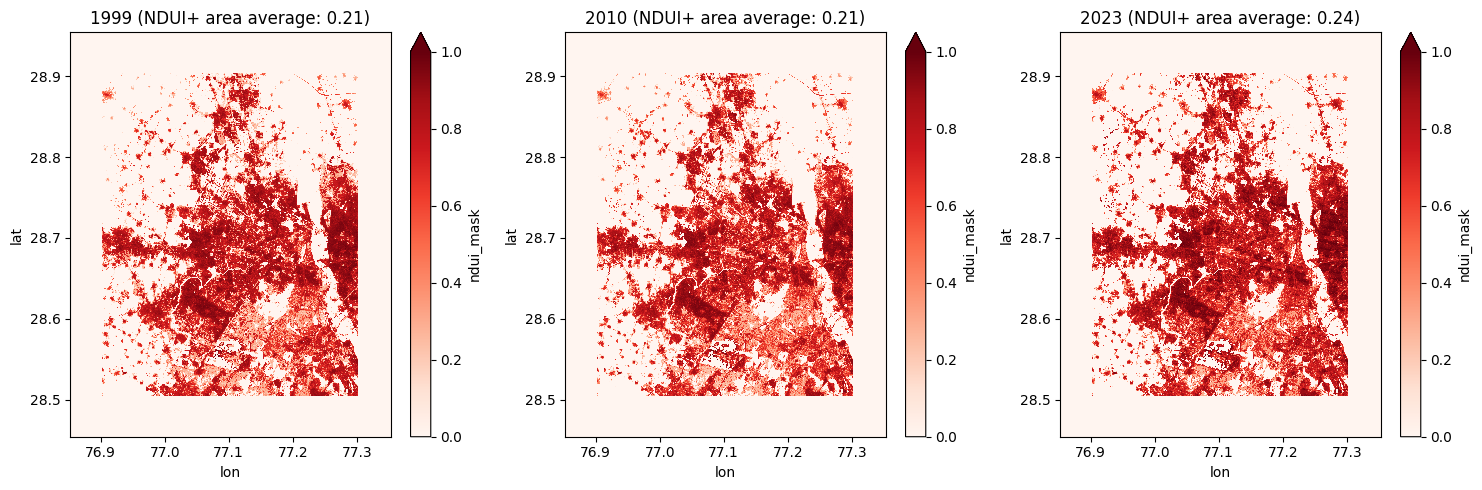

In [114]:
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

# Creating mock data arrays to simulate ds_delhi with random values for demonstration
years = [1999, 2010, 2023]

# Plotting the data as subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, year in enumerate(years):
    mean_value = np.nanmean(ds_delhi[i].ndui_mask.mean('lat').mean('lon').values)
    ds_delhi[i].ndui_mask.plot(ax=axes[i], cmap="Reds", vmin=0.0, extend="max")
    axes[i].set_title(f"{year} (NDUI+ area average: {mean_value:.2f})")

plt.tight_layout()
plt.show()

In [115]:
ds_delhi[i].ndui_mask.mean('lat').mean('lon').values.item()

0.23900879938968844

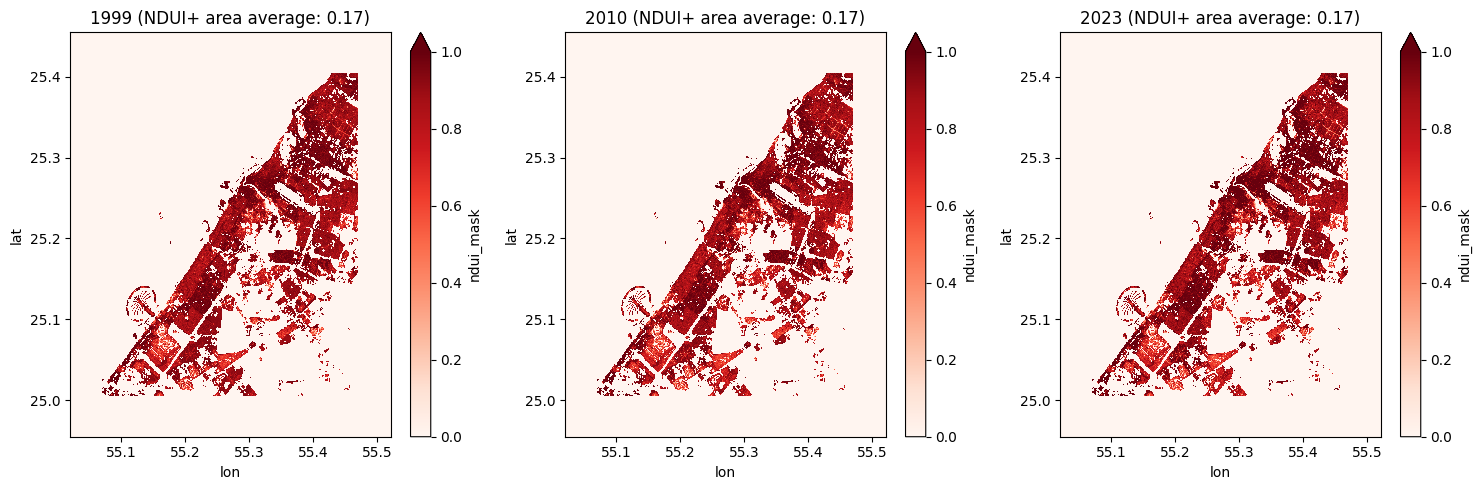

In [116]:
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

# Creating mock data arrays to simulate ds_delhi with random values for demonstration
years = [1999, 2010, 2023]

# Plotting the data as subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, year in enumerate(years):
    mean_value = np.nanmean(ds_dubai[i].ndui_mask.mean('lat').mean('lon').values)
    ds_dubai[i].ndui_mask.plot(ax=axes[i], cmap="Reds", vmin=0.0, extend="max")
    axes[i].set_title(f"{year} (NDUI+ area average: {mean_value:.2f})")

plt.tight_layout()
plt.show()

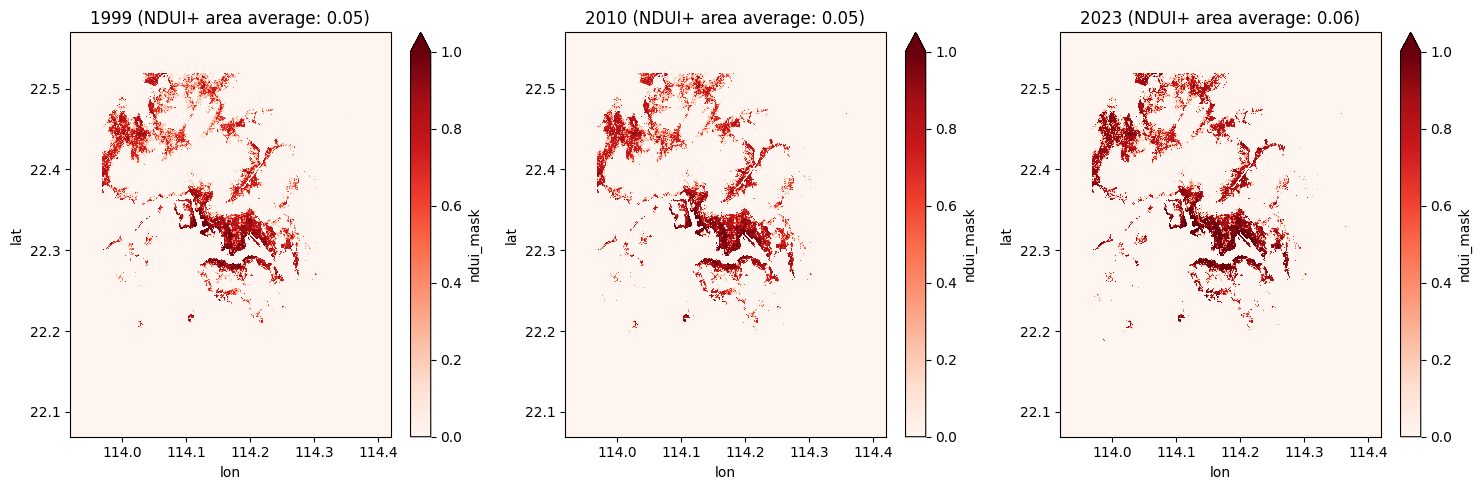

In [117]:
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

# Creating mock data arrays to simulate ds_delhi with random values for demonstration
years = [1999, 2010, 2023]

# Plotting the data as subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, year in enumerate(years):
    mean_value = np.nanmean(ds_hongkong[i].ndui_mask.mean('lat').mean('lon').values)
    ds_hongkong[i].ndui_mask.plot(ax=axes[i], cmap="Reds", vmin=0.0, extend="max")
    axes[i].set_title(f"{year} (NDUI+ area average: {mean_value:.2f})")

plt.tight_layout()
plt.show()

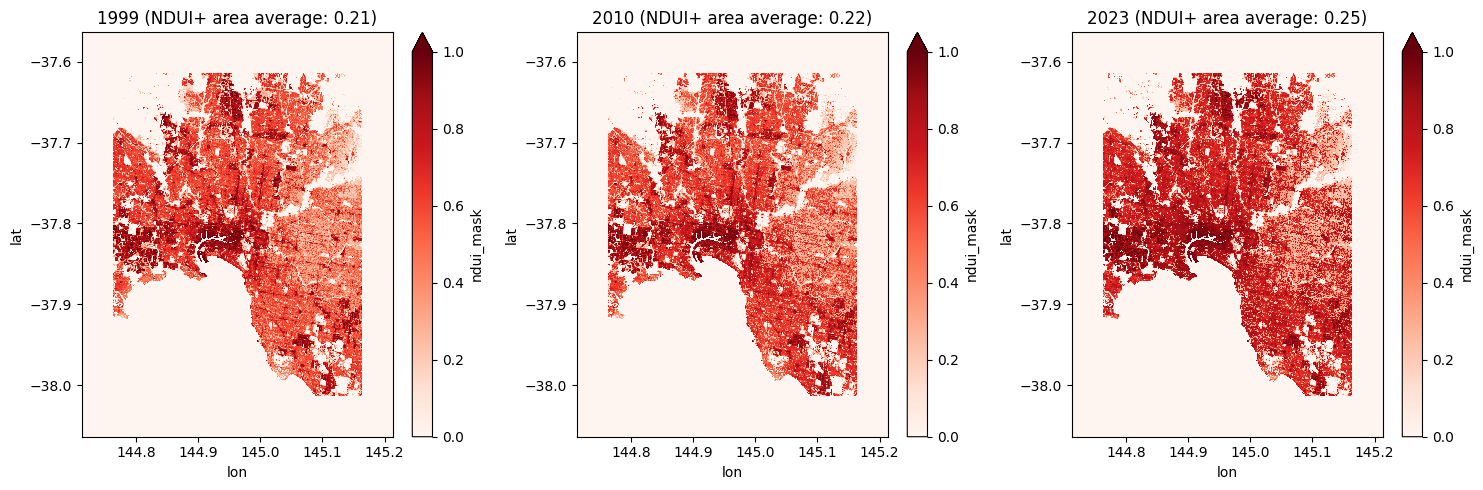

In [118]:
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

# Creating mock data arrays to simulate ds_delhi with random values for demonstration
years = [1999, 2010, 2023]

# Plotting the data as subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, year in enumerate(years):
    mean_value = np.nanmean(ds_melbourne[i].ndui_mask.mean('lat').mean('lon').values)
    ds_melbourne[i].ndui_mask.plot(ax=axes[i], cmap="Reds", vmin=0.0, extend="max")
    axes[i].set_title(f"{year} (NDUI+ area average: {mean_value:.2f})")

plt.tight_layout()
plt.show()

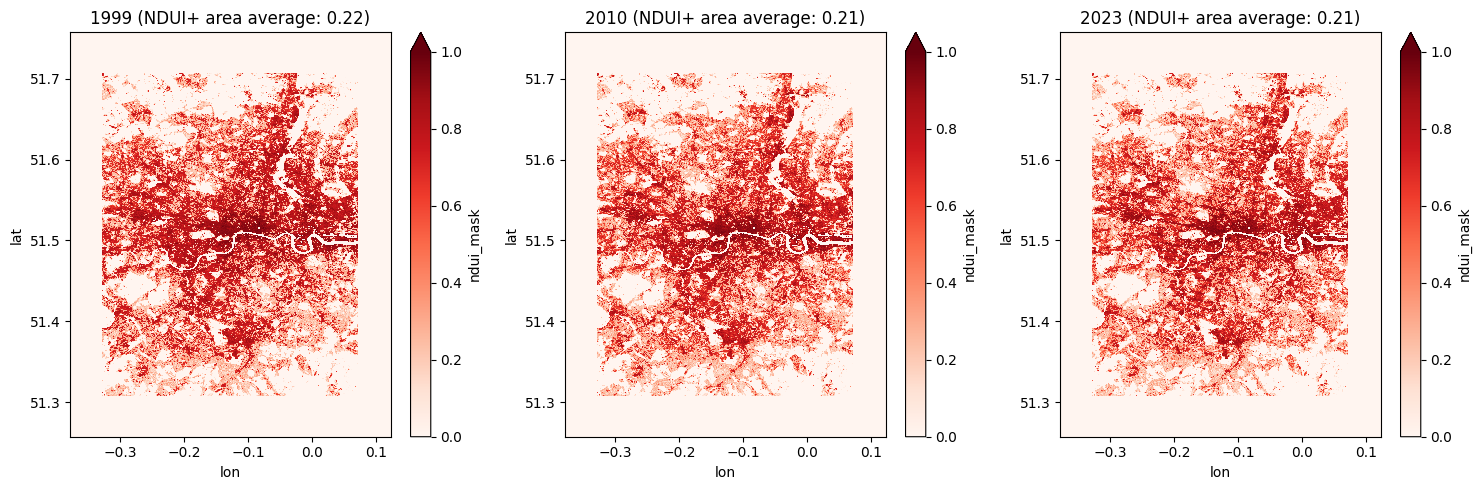

In [119]:
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

# Creating mock data arrays to simulate ds_delhi with random values for demonstration
years = [1999, 2010, 2023]

# Plotting the data as subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, year in enumerate(years):
    mean_value = np.nanmean(ds_london[i].ndui_mask.mean('lat').mean('lon').values)
    ds_london[i].ndui_mask.plot(ax=axes[i], cmap="Reds", vmin=0.0, extend="max")
    axes[i].set_title(f"{year} (NDUI+ area average: {mean_value:.2f})")

plt.tight_layout()
plt.show()

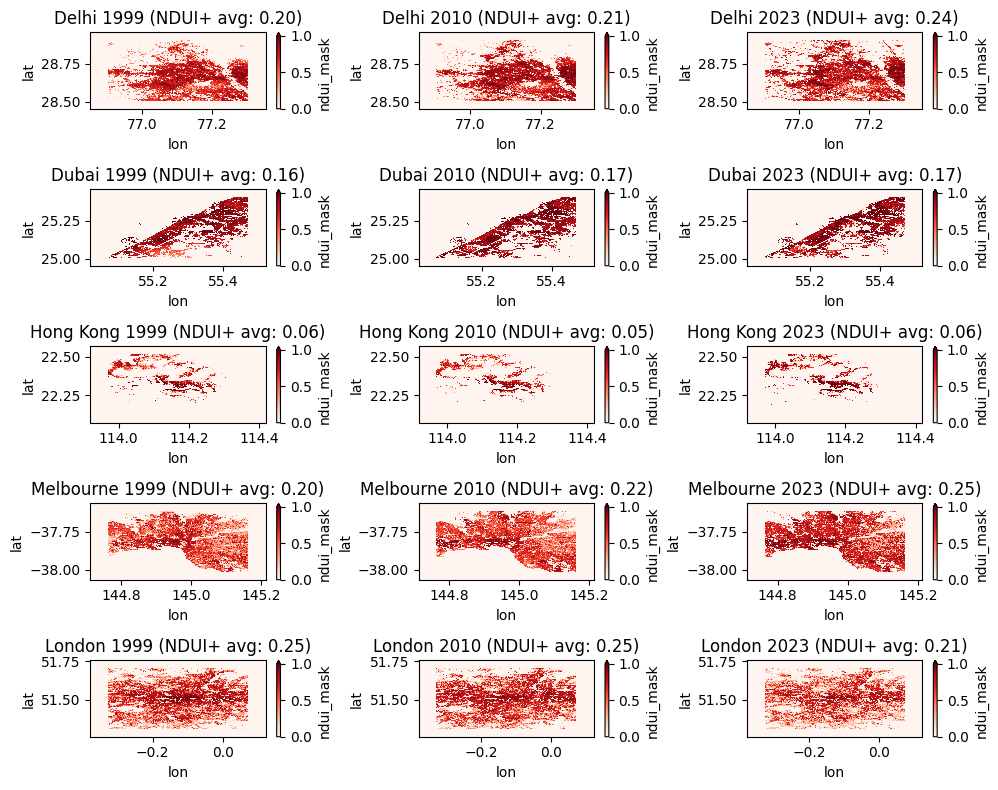

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Define the cities and years for the data
cities = ['Delhi', 'Dubai', 'Hong Kong', 'Melbourne', 'London']
years = [1999, 2010, 2023]

# Initialize figure with rows corresponding to cities and columns to years
fig, axes = plt.subplots(len(cities), len(years), figsize=(10, 8))

# Mock data arrays to simulate datasets for each city (replace with your actual data variables)
# Replace ds_city with the actual data structure, e.g., ds_delhi, ds_dubai, etc.
ds_city = [ds_delhi, ds_dubai, ds_hongkong, ds_melbourne, ds_london]
for row, city in enumerate(cities):
    for col, year in enumerate(years):

        # Calculate the mean NDUI+ value over lat/lon for the specific year
        mean_value = np.nanmean(ds_city[row][col].ndui_mask.mean('lat').mean('lon').values)

        # Plot the data with a consistent color map and limits
        ds_city[row][col].ndui_mask.plot(ax=axes[row, col], cmap="gist_stern_r", vmin=0.0, extend="max")

        # Set title for each subplot
        axes[row, col].set_title(f"{city} {year} (NDUI+ avg: {mean_value:.2f})")

# Adjust layout for a cleaner look
plt.tight_layout()
plt.savefig('ndui_international.png', dpi=500)

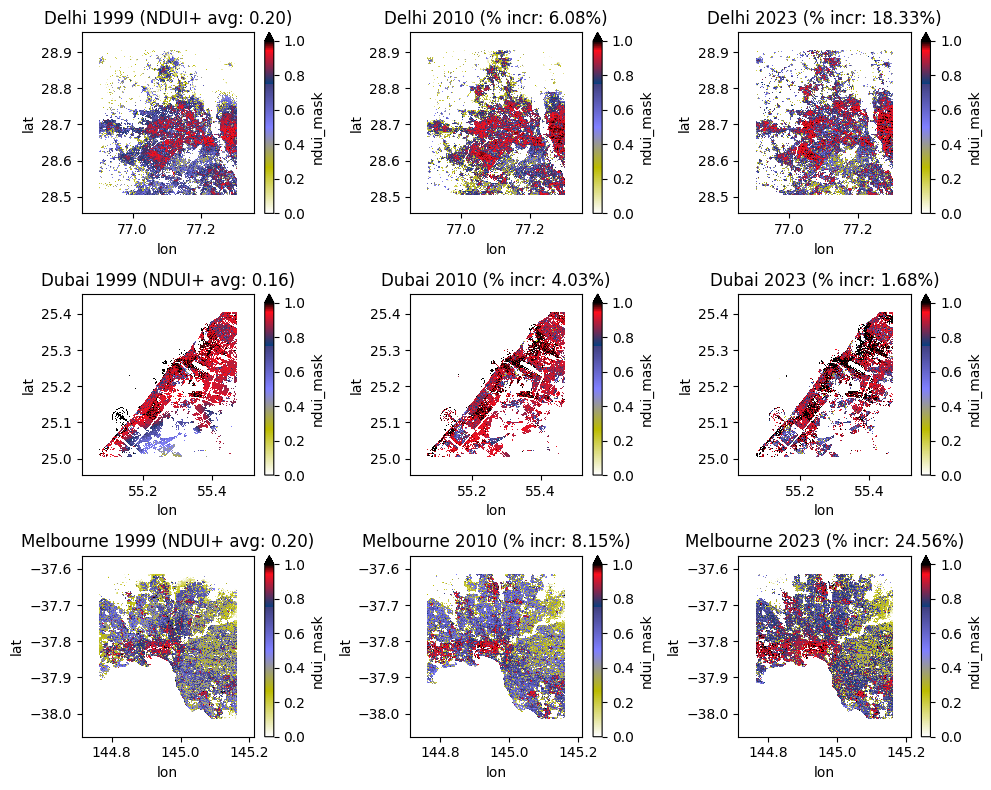

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Define the cities and years for the data
cities = ['Delhi', 'Dubai',  'Melbourne']
years = [1999, 2010, 2023]

# Initialize figure with rows corresponding to cities and columns to years
fig, axes = plt.subplots(len(cities), len(years), figsize=(10, 8))

# Mock data arrays to simulate datasets for each city (replace with your actual data variables)
# Replace ds_city with the actual data structure, e.g., ds_delhi, ds_dubai, etc.
ds_city = [ds_delhi, ds_dubai,  ds_melbourne]

for row, city in enumerate(cities):
    # Calculate the mean NDUI+ value for the first year as a baseline
    baseline_mean_value = np.nanmean(ds_city[row][0].ndui_mask.mean('lat').mean('lon').values)

    for col, year in enumerate(years):
        # Calculate the mean NDUI+ value for the specific year
        mean_value = np.nanmean(ds_city[row][col].ndui_mask.mean('lat').mean('lon').values)

        # If it's the first column (1999), show the absolute NDUI+ values
        if col == 0:
            title_text = f"{city} {year} (NDUI+ avg: {mean_value:.2f})"
        else:
            # For the second and third columns, show percentage increase from 1999
            percent_increase = ((mean_value - baseline_mean_value) / baseline_mean_value) * 100
            title_text = f"{city} {year} (% incr: {percent_increase:.2f}%)"

        # Plot the data with a consistent color map and limits
        ds_city[row][col].ndui_mask.plot(ax=axes[row, col], cmap="gist_stern_r", vmin=0.0, extend="max")

        # Set title for each subplot
        axes[row, col].set_title(title_text)

# Adjust layout for a cleaner look
plt.tight_layout()
plt.savefig('ndui_international.png', dpi=500)